In [3]:
import csv, os ; from glob import glob
import numpy as np ; import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import import_ipynb
import MAZI_EDA
import utils

df_98,df_35,train_test_set,validation_set=MAZI_EDA.make_dataframe('GNB/100_new', 'GNB/35_new')

In [4]:
df_98.to_csv('train_raw_data_dcoffset.csv')
df_35.to_csv('test_raw_data_dcoffset.csv')


특정 유저 특징 채널 불러오기


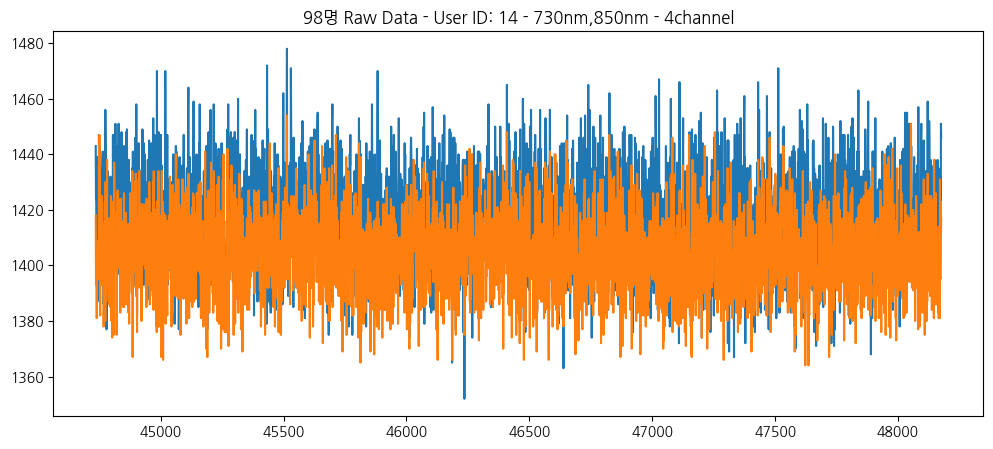

In [3]:
MAZI_EDA.raw_data_plot(df_98,98,14,4)

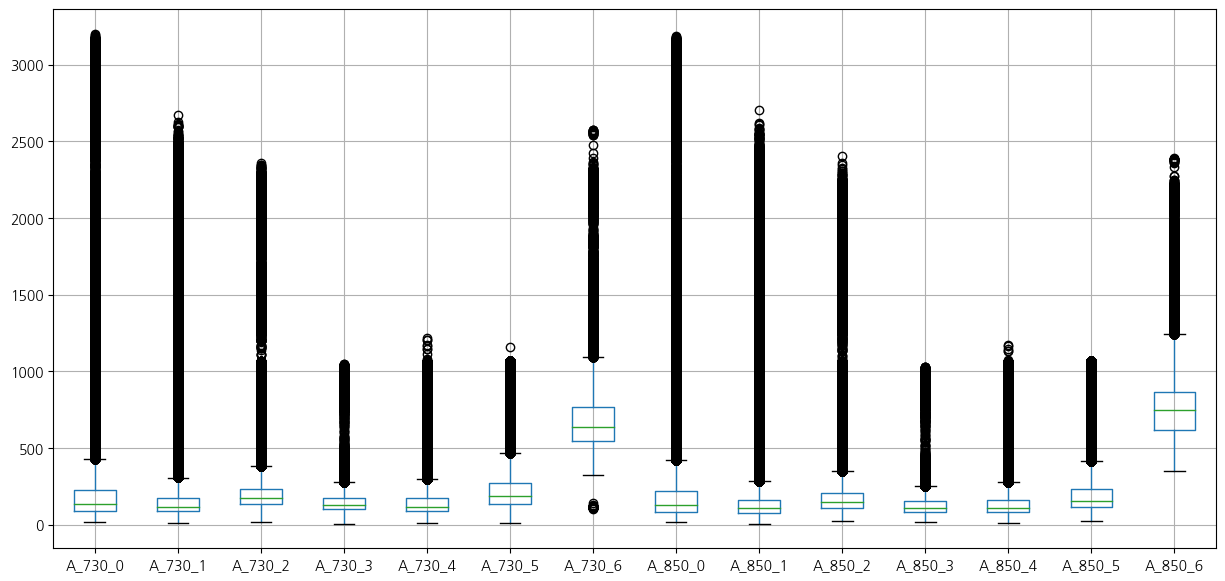

In [4]:
MAZI_EDA.data_boxplot(df_98)

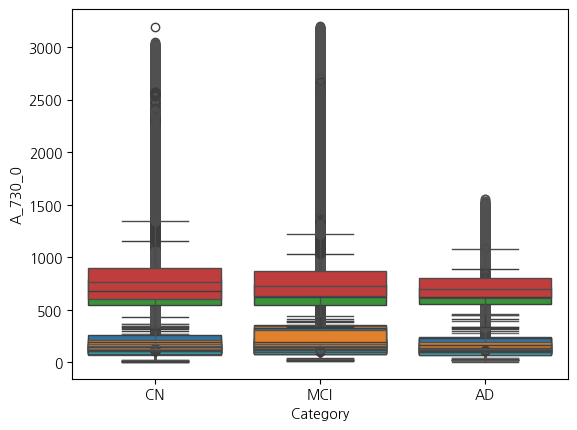

In [5]:
MAZI_EDA.category_boxplot(df_98)

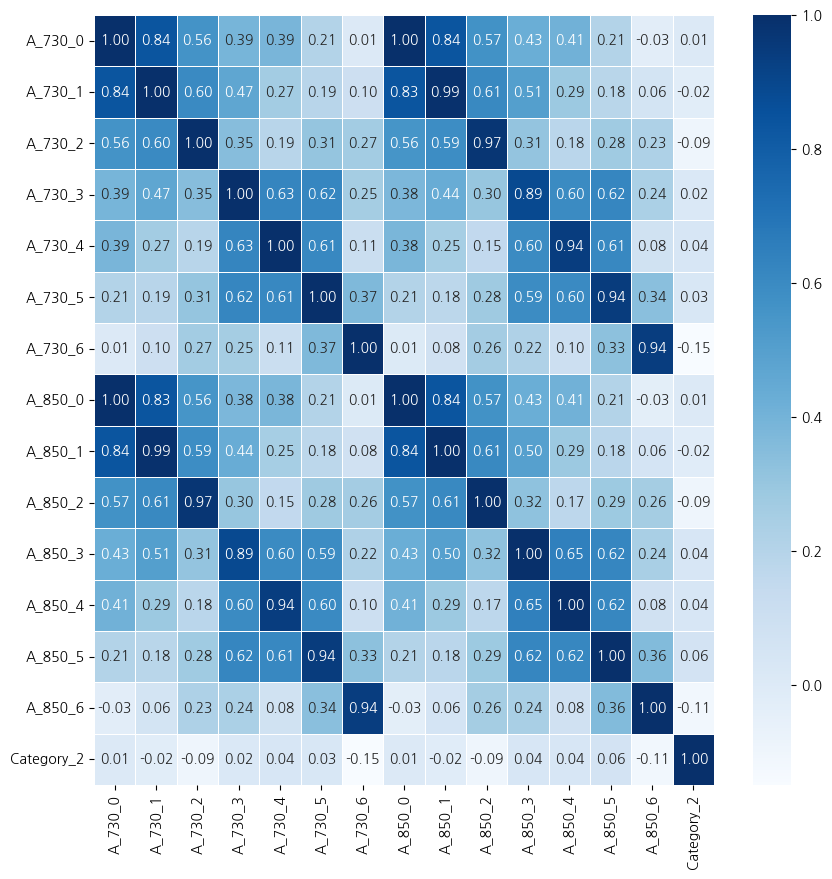

In [11]:
MAZI_EDA.columns_heatmap(df_98)

In [7]:
# MAZI_EDA.scatter_per_category(df_98, 730)

IQR은 74.0 이다.
lower bound 값은 -57.0 이다.
upper bound 값은 239.0 이다.
A_730_0 컬럼의 총 이상치 건수는 43051 이다.
A_730_0 컬럼에 대한 모든 유저의 이상치를 출력합니다.


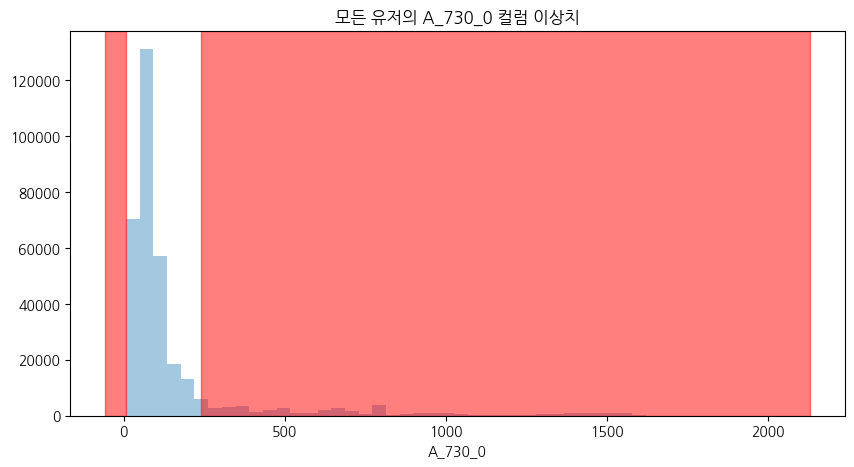


이상치가 존재하는 유저 목록 : [5, 9, 11, 19, 21, 22, 23, 30, 33, 37, 42, 44, 49, 50, 53, 55, 57, 58, 59, 60, 64, 67, 70, 72, 75, 79, 80, 81, 89, 90, 95]
91번 유저의 이상치 구간(실선은 제외) | 이상치 건수 : 0 (주황색 그래프)
A_730_0 컬럼의 91 유저의 이상치를 출력합니다.


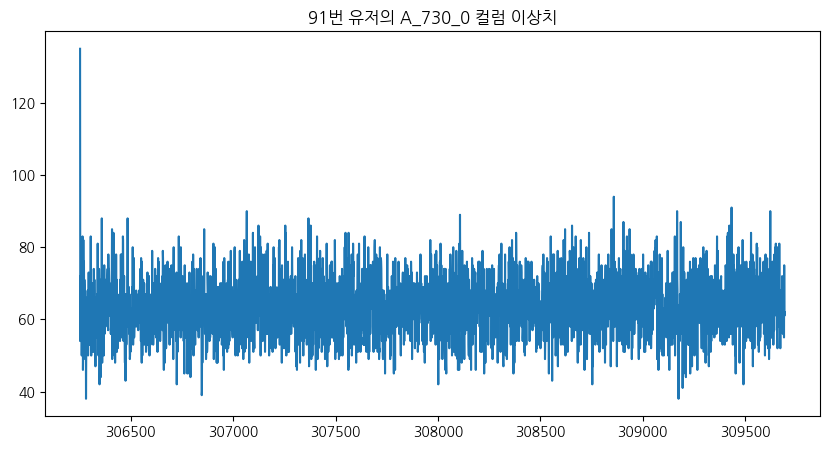

In [10]:
MAZI_EDA.outlier_iqr(df_98, 'A_730_0',91)

In [3]:
wave_98_butter, wave_35_butter = MAZI_EDA.wavelet_convert_butterworth(df_98, df_35)

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

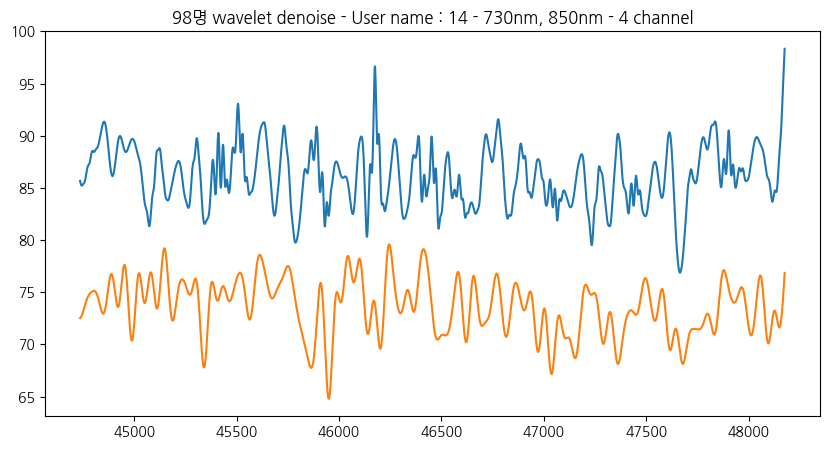

In [4]:
MAZI_EDA.wavelet_plot(wave_98_butter, 98, 14, 4)

In [5]:
wave_98_kal, wave_35_kal = MAZI_EDA.wavelet_convert_kalman(df_98, df_35)

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

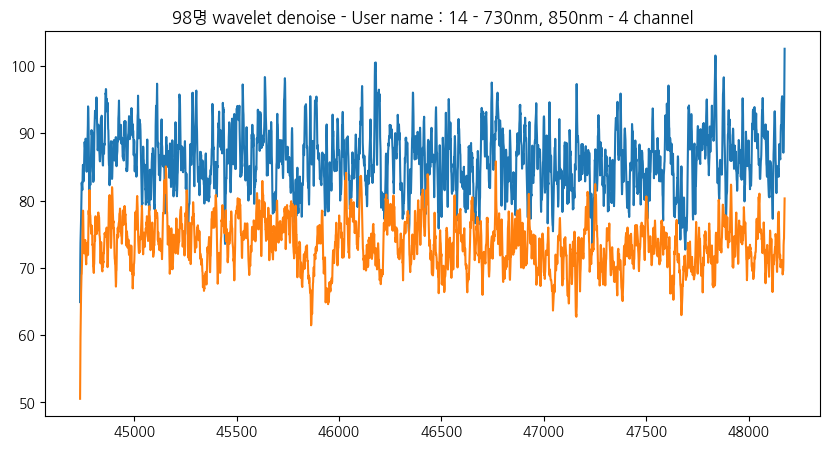

In [6]:
MAZI_EDA.wavelet_plot(wave_98_kal, 98, 14, 4)

In [2]:
wave_98_gaussian, wave_35_gaussian = MAZI_EDA.wavelet_convert_gaussian(df_98, df_35)

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

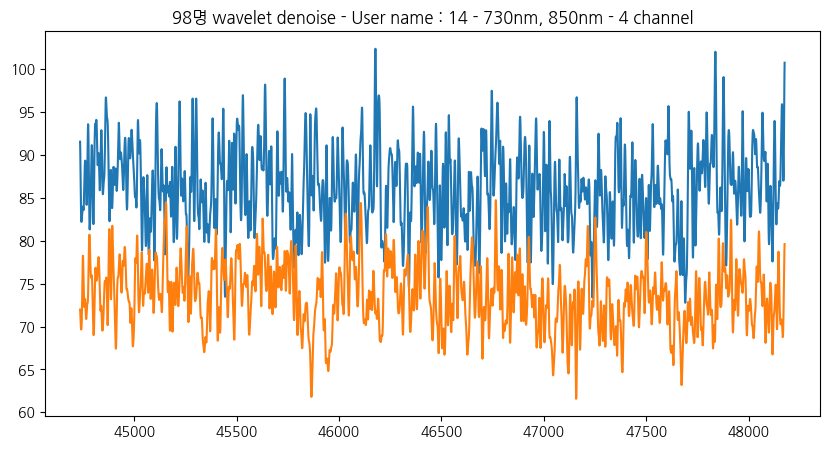

In [3]:
MAZI_EDA.wavelet_plot(wave_98_gaussian, 98, 14, 4)

In [5]:
# 광학밀도 변환
# start -> 신호는 측정시작시 각종 요소에 의해 많은 노이즈가 발생함
# 이를 제거하여 초기 구간의 불안정한 신호를 제거하여 광학밀도 변환을 실시합니다.
# 웨이블릿 변환한 데이터가 필요함

od_wave98_butter, od_wave35_butter = MAZI_EDA.od_convert(wave_98_butter, wave_35_butter, 100)

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

In [11]:
od_wave98_kal, od_wave35_kal = MAZI_EDA.od_convert(wave_98_kal, wave_35_kal, 100)

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

In [4]:
od_wave98_gaussian, od_wave35_gaussian = MAZI_EDA.od_convert(wave_98_gaussian, wave_35_gaussian, 100)

  0%|          | 0/98 [00:00<?, ?it/s]

  0%|          | 0/38 [00:00<?, ?it/s]

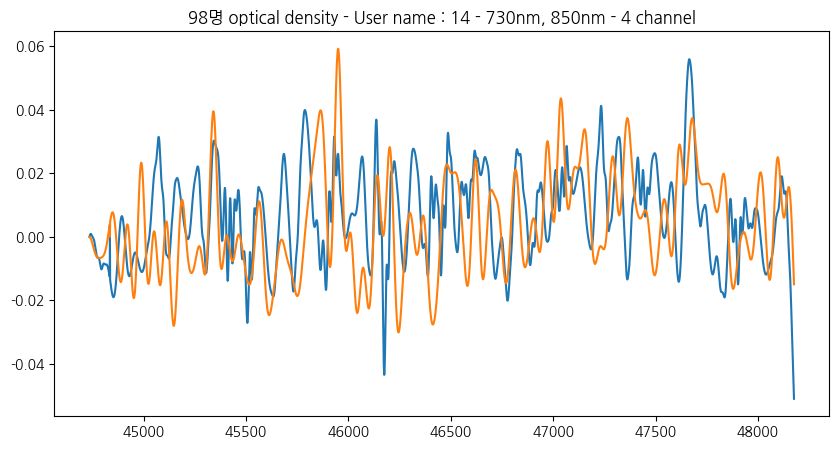

In [6]:
MAZI_EDA.od_plot(od_wave98_butter, 98, 14, 4)

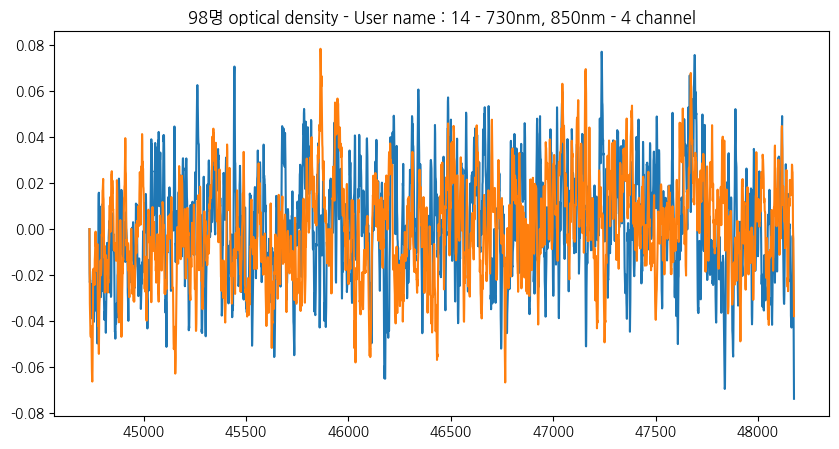

In [13]:
MAZI_EDA.od_plot(od_wave98_kal, 98, 14, 4)

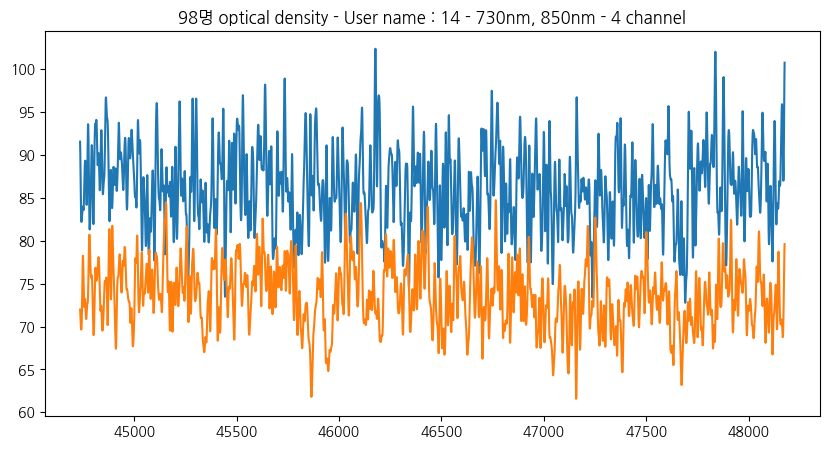

In [5]:
MAZI_EDA.od_plot(wave_98_gaussian, 98, 14, 4)

In [7]:
hb_98_butter, hb_35_butter = MAZI_EDA.hc_convert(od_wave98_butter, od_wave35_butter)

In [15]:
hb_98_kal, hb_35_kal = MAZI_EDA.hc_convert(od_wave98_kal, od_wave35_kal)

In [6]:
hb_98_gaussian, hb_35_gaussian = MAZI_EDA.hc_convert(od_wave98_gaussian, od_wave35_gaussian)

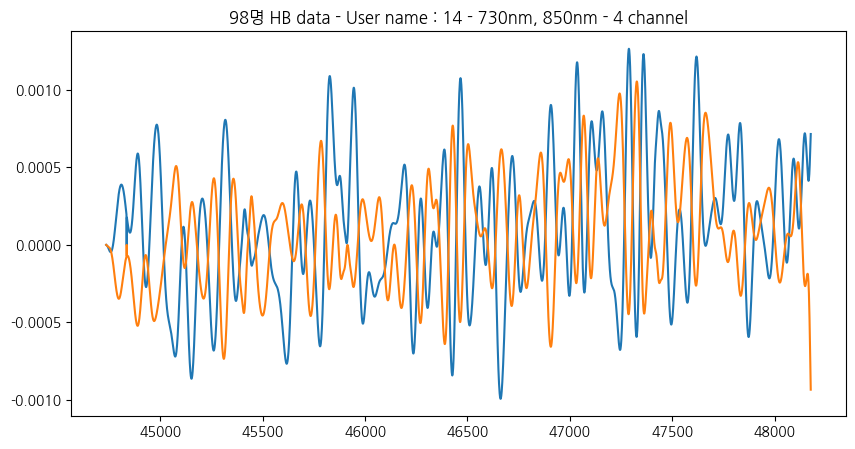

In [8]:
MAZI_EDA.hb_plot(hb_98_butter, 98, 14, 4)

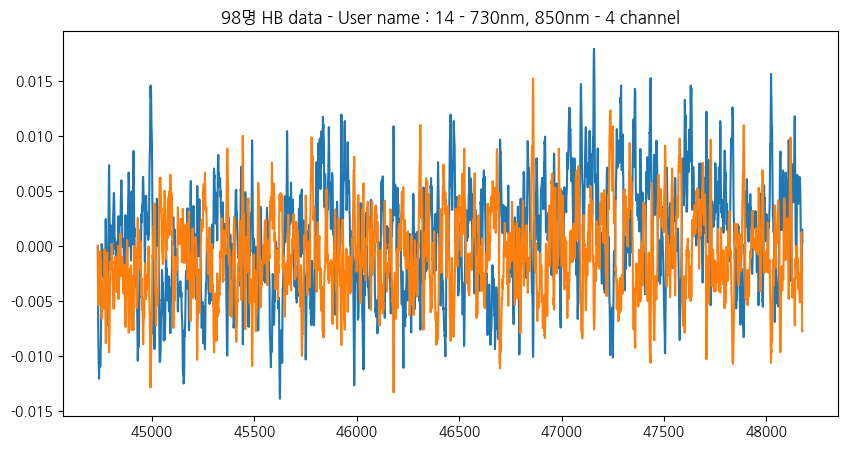

In [17]:
MAZI_EDA.hb_plot(hb_98_kal, 98, 14, 4)

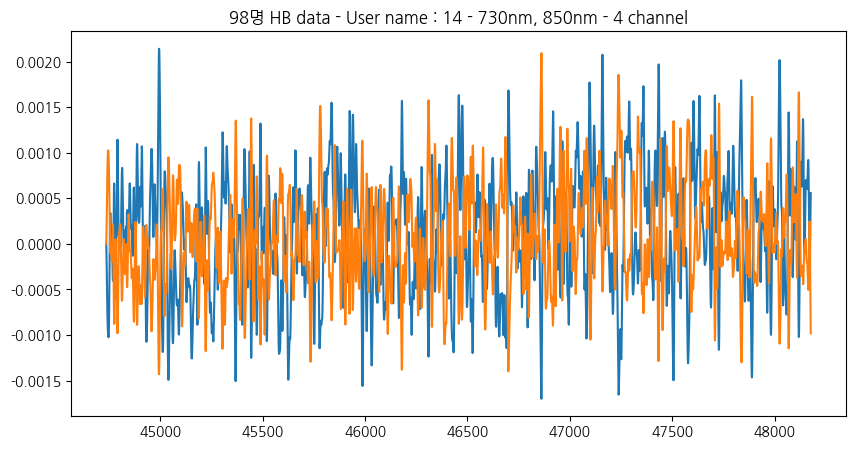

In [7]:
MAZI_EDA.hb_plot(hb_98_gaussian, 98, 14, 4)

In [9]:
chb_98_butter, chb_35_butter = MAZI_EDA.chb_convert(hb_98_butter, hb_35_butter)

In [19]:
chb_98_kal, chb_35_kal = MAZI_EDA.chb_convert(hb_98_kal, hb_35_kal)

In [8]:
chb_98_gaussian, chb_35_gaussian = MAZI_EDA.chb_convert(hb_98_gaussian, hb_35_gaussian)

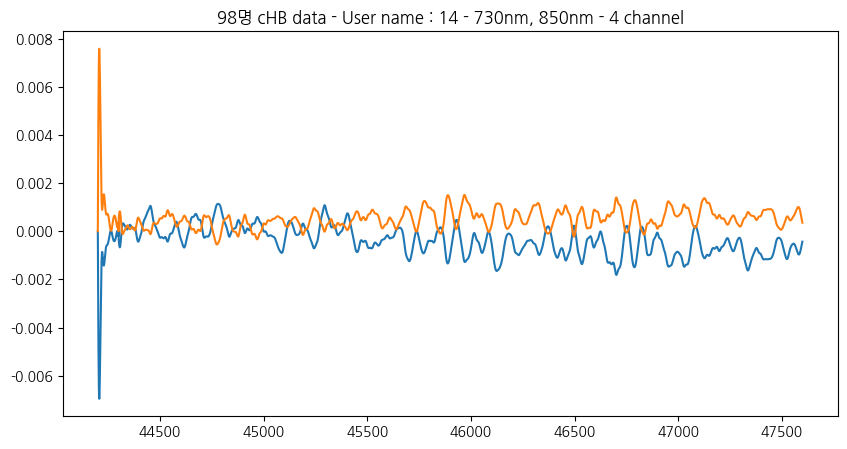

In [11]:
MAZI_EDA.chb_plot(chb_98_butter, 98, 14, 4)

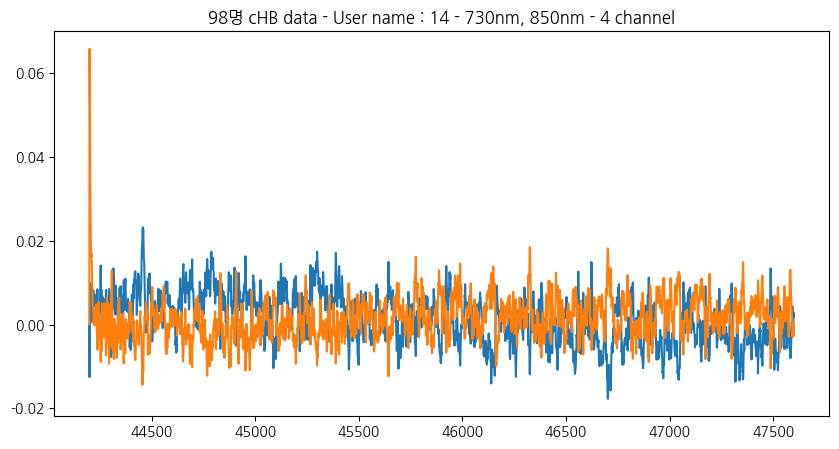

In [21]:
MAZI_EDA.chb_plot(chb_98_kal, 98, 14, 4)

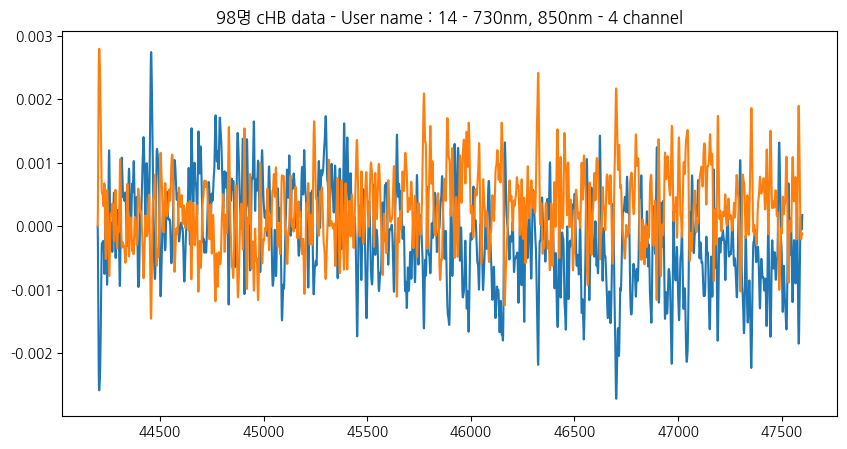

In [9]:
MAZI_EDA.chb_plot(chb_98_gaussian, 98, 14, 4)

In [14]:
# chb_98_kal.to_csv('chb_kalman_filter_98.csv')
# chb_35_kal.to_csv('chb_kalman_filter_35.csv')
# chb_98_butter.to_csv('chb_butter_filter_98.csv')
# chb_35_butter.to_csv('chb_butter_filter_35.csv')
# chb_98_gaussian.to_csv('chb_gaussian_filter_98.csv')
# chb_35_gaussian.to_csv('chb_gaussian_filter_35.csv')

# chb_98_butter.to_csv('chb_butter_filter_98_db16.csv')
# chb_35_butter.to_csv('chb_butter_filter_35_db16.csv')

In [12]:
chb_98_gaussian

,uid,chbo_1,chbo_2,chbo_3,chbo_4,chbo_5,chbo_6,chbr_1,chbr_2,chbr_3,chbr_4,chbr_5,chbr_6,lr01,dc_lr01,mean_chb,Category
0,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000113,0.000000,CN
1,1,-0.000700,-0.000638,-0.000563,-0.000599,-0.000655,-0.000596,0.000785,0.000670,0.000626,0.000668,0.000739,0.000662,-0.000063,-0.000176,-0.001317,CN
2,1,-0.001971,-0.001789,-0.001586,-0.001680,-0.001854,-0.001707,0.002222,0.001893,0.001769,0.001890,0.002096,0.001876,-0.000128,-0.000241,-0.003722,CN
3,1,-0.003274,-0.002951,-0.002642,-0.002774,-0.003116,-0.002929,0.003725,0.003170,0.002962,0.003168,0.003525,0.003160,-0.000051,-0.000164,-0.006233,CN
4,1,-0.004221,-0.003761,-0.003427,-0.003552,-0.004092,-0.003974,0.004863,0.004135,0.003868,0.004144,0.004629,0.004168,0.000284,0.000171,-0.008139,CN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333195,99,-0.002923,-0.003628,-0.002773,-0.002288,-0.004092,-0.002463,0.001539,0.002732,0.002064,0.000915,0.002548,0.000622,-0.002731,-0.002844,-0.004765,AD
333196,99,-0.003230,-0.003238,-0.002362,-0.002287,-0.003639,-0.002204,0.001690,0.002584,0.002063,0.000930,0.002222,0.000518,-0.003368,-0.003481,-0.004494,AD
333197,99,-0.003361,-0.002617,-0.001774,-0.002088,-0.002795,-0.001817,0.001750,0.002290,0.001884,0.000827,0.001579,0.000288,-0.004283,-0.004396,-0.003845,AD
333198,99,-0.003312,-0.001846,-0.001090,-0.001720,-0.001733,-0.001344,0.001697,0.001872,0.001550,0.000623,0.000748,-0.000027,-0.005227,-0.005340,-0.002918,AD
